In [2]:
import pandas as pd
import statsmodels.api as sm
#import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [3]:
gdp_per_capita = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
life_expectency = pd.read_csv('data/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
child_mortality = pd.read_csv('data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')

In [4]:
cont_map = pd.read_csv('data/ddf--entities--geo--country.csv')

In [5]:
data = pd.merge(gdp_per_capita, life_expectency)
data = pd.merge(data, child_mortality)
data = pd.merge(data,cont_map[['country', 'world_4region']], left_on = 'geo', right_on = 'country')

In [6]:
data

,geo,time,gdppercapita_us_inflation_adjusted,life_expectancy_years,child_mortality_0_5_year_olds_dying_per_1000_born,country,world_4region
0,abw,2010,24271.94042,75.06,17.969,abw,americas
1,afg,2002,364.57057,52.43,122.200,afg,asia
2,afg,2003,376.75871,53.03,118.300,afg,asia
3,afg,2004,364.09544,53.50,114.400,afg,asia
4,afg,2005,389.41636,53.87,110.300,afg,asia
...,...,...,...,...,...,...,...
8571,zwe,2013,942.03866,55.59,70.000,zwe,africa
8572,zwe,2014,939.78027,56.99,64.300,zwe,africa
8573,zwe,2015,933.50327,58.27,59.900,zwe,africa
8574,zwe,2016,917.56372,59.27,56.400,zwe,africa


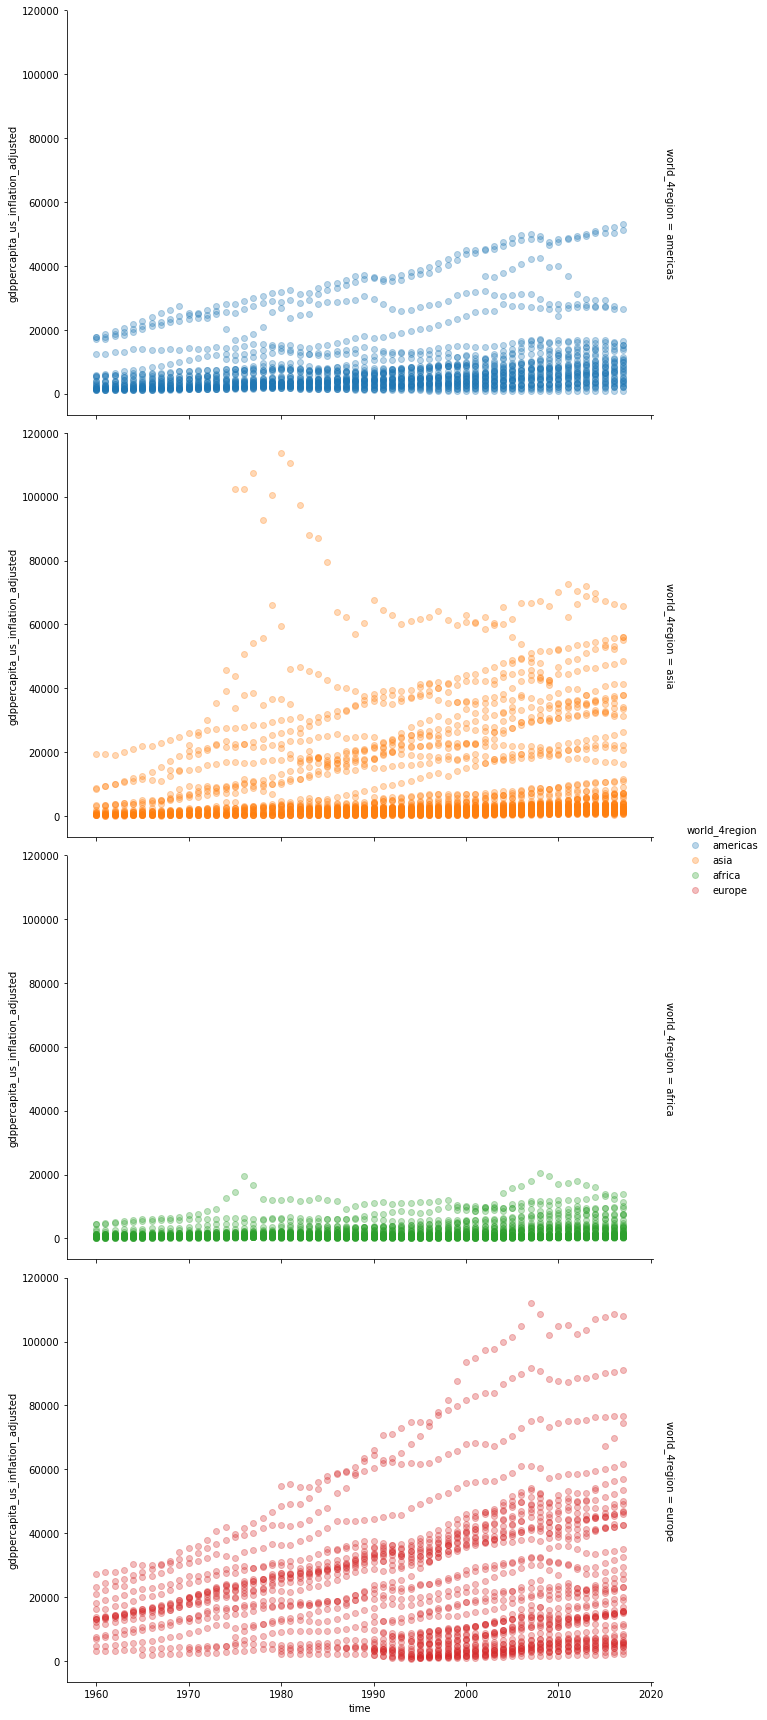

In [78]:
fg = seaborn.FacetGrid(data=data[['gdppercapita_us_inflation_adjusted',
                                  'time', 'world_4region']],
                       hue='world_4region', row = 'world_4region',
                       margin_titles = True,
                       aspect=1.61, height = 6)

fg.map(plt.scatter, 'time', 'gdppercapita_us_inflation_adjusted',
        alpha = 0.3).add_legend()

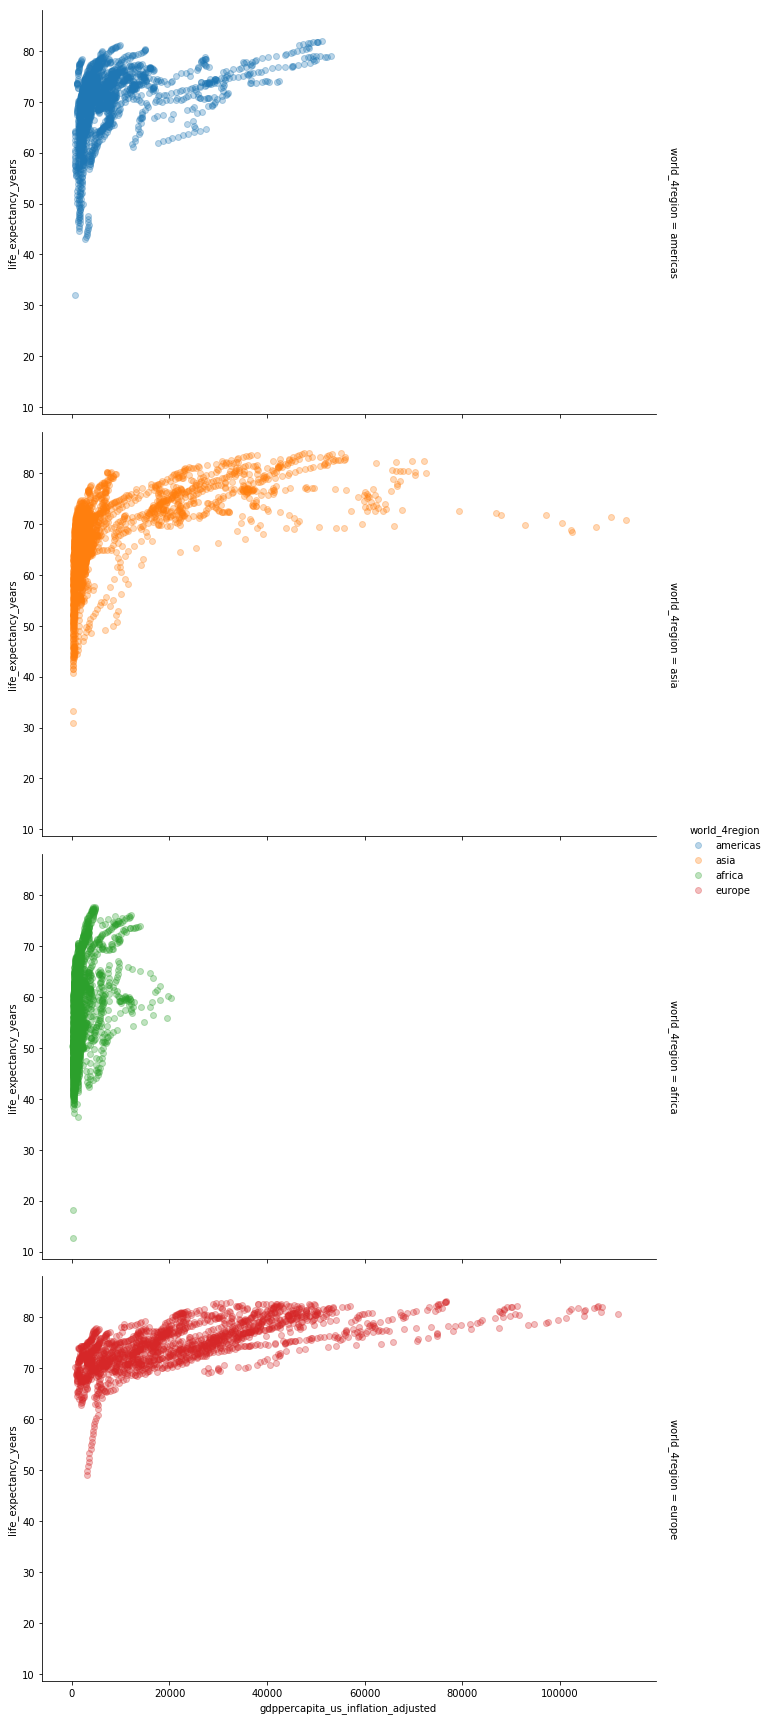

In [80]:
fg = seaborn.FacetGrid(data=data[['gdppercapita_us_inflation_adjusted',
                                  'life_expectancy_years', 'world_4region']],
                       hue='world_4region', row = 'world_4region',
                       margin_titles = True,
                       aspect=1.61, height = 6)

fg.map(plt.scatter, 'gdppercapita_us_inflation_adjusted', 'life_expectancy_years',
        alpha = 0.3).add_legend()

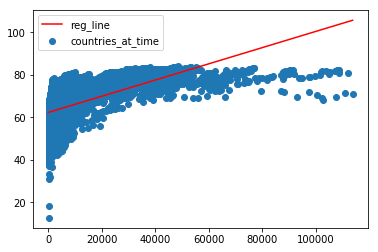

In [40]:
X = data[['gdppercapita_us_inflation_adjusted']]
#X = data[['gdppercapita_us_inflation_adjusted']]
X = sm.add_constant(X)
y = data['life_expectancy_years']
results = sm.OLS(y, X, data=data).fit()

fig, axes = plt.subplots(1,1)

parameter_10 = results.conf_int(alpha = 0.05)[1][0]
parameter_00 = results.conf_int(alpha = 0.05)[0][0]
parameter_11 = results.conf_int(alpha = 0.05)[1][1]
parameter_01 = results.conf_int(alpha = 0.05)[0][1]
parameter_1 = results.params[1]
parameter_0 = results.params[0]

reg_line     = lambda x: x * parameter_1 + parameter_0
conf_05_line = lambda x: x * parameter_10 + parameter_00
conf_95_line = lambda x: x * parameter_11 + parameter_01



x_conf_05 = [i for i in tqdm(range(int(max(X['gdppercapita_us_inflation_adjusted']))))]
y_conf_05 = [conf_05_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]

x_conf_95 = [i for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]
y_conf_95 = [conf_95_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]


ols_line_x = [i for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]
ols_line_y = [reg_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]

axes.scatter(X['gdppercapita_us_inflation_adjusted'], y, label = 'countries_at_time')
axes.plot(ols_line_x, ols_line_y, label = 'reg_line', color = 'red')
#axes.plot(x_conf_95, y_conf_95, label = '95_conf')
#axes.plot(x_conf_05, y_conf_05, label = '05_conf')
axes.legend()

In [55]:
X

,const,gdppercapita_us_inflation_adjusted,gdppercapita_us_inflation_adjusted_sq
0,1.0,10.097076,5.891271e+08
1,1.0,5.898720,1.329117e+05
2,1.0,5.931605,1.419471e+05
3,1.0,5.897416,1.325655e+05
4,1.0,5.964649,1.516451e+05
...,...,...,...
8571,1.0,6.848046,8.874368e+05
8572,1.0,6.845646,8.831870e+05
8573,1.0,6.838944,8.714284e+05
8574,1.0,6.821722,8.419232e+05


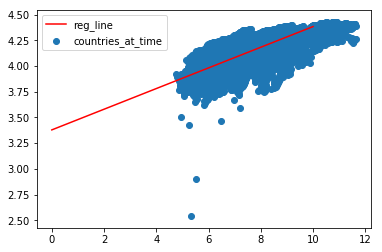

In [50]:
X = np.log(data[['gdppercapita_us_inflation_adjusted']])
X['gdppercapita_us_inflation_adjusted_sq'] =\
                    data[['gdppercapita_us_inflation_adjusted']]

#X['time'] = data[['time']]
X = sm.add_constant(X)
y = np.log(data['life_expectancy_years'])
results = sm.OLS(y, X, data=data).fit()

fig, axes = plt.subplots(1,1)

parameter_10 = results.conf_int(alpha = 0.05)[1][0]
parameter_00 = results.conf_int(alpha = 0.05)[0][0]
parameter_11 = results.conf_int(alpha = 0.05)[1][1]
parameter_01 = results.conf_int(alpha = 0.05)[0][1]
parameter_1 = results.params[1]
parameter_0 = results.params[0]

reg_line     = lambda x: x * parameter_1 + parameter_0
conf_05_line = lambda x: x * parameter_10 + parameter_00
conf_95_line = lambda x: x * parameter_11 + parameter_01



x_conf_05 = [i for i in tqdm(range(int(max(X['gdppercapita_us_inflation_adjusted']))))]
y_conf_05 = [conf_05_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]

x_conf_95 = [i for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]
y_conf_95 = [conf_95_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]


ols_line_x = [i for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]
ols_line_y = [reg_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]

axes.scatter(X['gdppercapita_us_inflation_adjusted'], y, label = 'countries_at_time')
axes.plot(ols_line_x, ols_line_y, label = 'reg_line', color = 'red')
#axes.plot(x_conf_95, y_conf_95, label = '95_conf')
#axes.plot(x_conf_05, y_conf_05, label = '05_conf')
axes.legend()

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.600
Model:                               OLS   Adj. R-squared:                  0.600
Method:                    Least Squares   F-statistic:                     6431.
Date:                   Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                           23:43:21   Log-Likelihood:                 7341.6
No. Observations:                   8576   AIC:                        -1.468e+04
Df Residuals:                       8573   BIC:                        -1.466e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.3789      0.009    363.770      0.000       3.361       3.397
gdppercapita_us_inflation_adjusted        0.1005      0.001     80.718      0.000       0.098       0.103
gdppercapita_us_inflation_adjusted_sq -2.229e-06   1.23e-07    -18.090      0.000   -2.47e-06   -1.99e-06
==============================================================================
Omnibus:                     2362.132   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14905.338
Skew:                          -1.168   Prob(JB):                         0.00
Kurtosis:                       9.021   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

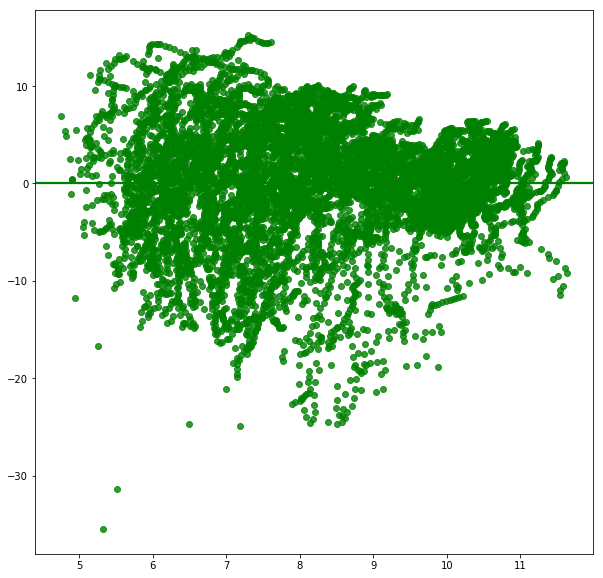

In [126]:
fig = plt.figure(figsize = ((10, 10)))
sns.residplot(np.log(X), y, order = 2, lowess=True, color="g")

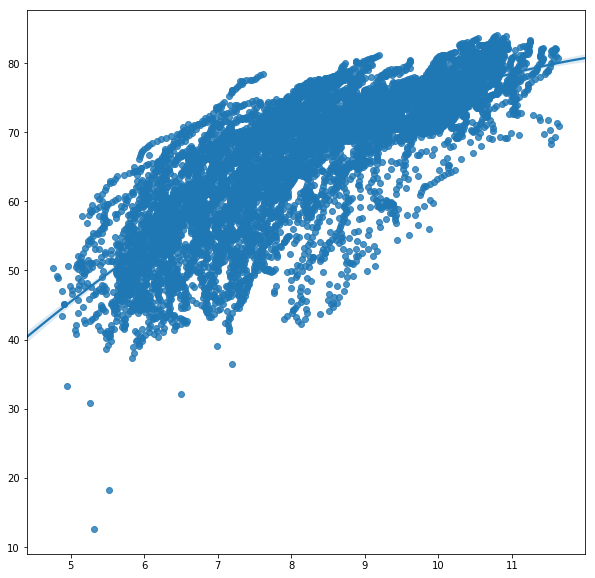

In [125]:
fig = plt.figure(figsize = ((10, 10)))
sns.regplot(np.log(X), y, order = 2, data=data)

In [ ]:
X = np.log(data[['gdppercapita_us_inflation_adjusted']])
#X['gdppercapita_us_inflation_adjusted_sq'] =\
#                    np.power(data[['gdppercapita_us_inflation_adjusted']],2)

#X['time'] = data[['time']]
X = sm.add_constant(X)
y = np.log(data['life_expectancy_years'])
results = sm.OLS(y, X, data=data).fit()

In [14]:
X = np.log(data[['gdppercapita_us_inflation_adjusted']])
#X['time'] = data['time']
#X = data[['gdppercapita_us_inflation_adjusted']]
X = sm.add_constant(X)
y = np.log(data['life_expectancy_years'])
results = sm.OLS(y, X, data=data).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.585
Model:                               OLS   Adj. R-squared:                  0.585
Method:                    Least Squares   F-statistic:                 1.208e+04
Date:                   Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                           23:24:44   Log-Likelihood:                 7180.9
No. Observations:                   8576   AIC:                        -1.436e+04
Df Residuals:                       8574   BIC:                        -1.434e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.5052      0.006    561.634      0.000       3.493       3.517
gdppercapita_us_inflation_adjusted     0.0823      0.001    109.889      0.000       0.081       0.084
==============================================================================
Omnibus:                     2241.006   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13605.640
Skew:                          -1.112   Prob(JB):                         0.00
Kurtosis:                       8.756   Cond. No.                         46.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Child Mortality

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


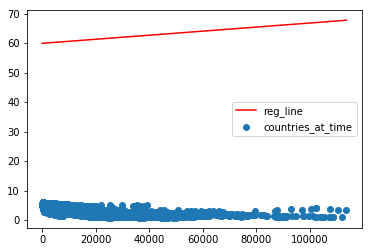

In [88]:
X = data[['gdppercapita_us_inflation_adjusted']]
X['gdppercapita_us_inflation_adjusted_sq'] =\
                    np.power(data[['gdppercapita_us_inflation_adjusted']], 0.5)

X['time'] = data[['time']]
X = sm.add_constant(X)
y = np.log(data['child_mortality_0_5_year_olds_dying_per_1000_born'])
results = sm.OLS(y, X, data=data).fit()

fig, axes = plt.subplots(1,1)

parameter_10 = results.conf_int(alpha = 0.05)[1][0]
parameter_00 = results.conf_int(alpha = 0.05)[0][0]
parameter_11 = results.conf_int(alpha = 0.05)[1][1]
parameter_01 = results.conf_int(alpha = 0.05)[0][1]
parameter_1 = results.params[1]
parameter_0 = results.params[0]

reg_line     = lambda x: x * parameter_1 + parameter_0
conf_05_line = lambda x: x * parameter_10 + parameter_00
conf_95_line = lambda x: x * parameter_11 + parameter_01



x_conf_05 = [i for i in tqdm(range(int(max(X['gdppercapita_us_inflation_adjusted']))))]
y_conf_05 = [conf_05_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]

x_conf_95 = [i for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]
y_conf_95 = [conf_95_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]


ols_line_x = [i for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]
ols_line_y = [reg_line(i) for i in range(int(max(X['gdppercapita_us_inflation_adjusted'])))]

axes.scatter(X['gdppercapita_us_inflation_adjusted'], y, label = 'countries_at_time')
axes.plot(ols_line_x, ols_line_y, label = 'reg_line', color = 'red')
#axes.plot(x_conf_95, y_conf_95, label = '95_conf')
#axes.plot(x_conf_05, y_conf_05, label = '05_conf')
axes.legend()

In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     child_mortality_0_5_year_olds_dying_per_1000_born   R-squared:                       0.807
Model:                                                           OLS   Adj. R-squared:                  0.807
Method:                                                Least Squares   F-statistic:                 1.199e+04
Date:                                               Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                                                       00:08:50   Log-Likelihood:                -6844.1
No. Observations:                                               8576   AIC:                         1.370e+04
Df Residuals:                                                   8572   BIC:                         1.372e+04
Df Model:                                                          3                                         
Covariance Type:                                           nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    59.9357      0.735     81.513      0.000      58.494      61.377
gdppercapita_us_inflation_adjusted     6.889e-05   1.31e-06     52.524      0.000    6.63e-05    7.15e-05
gdppercapita_us_inflation_adjusted_sq    -0.0308      0.000    -94.765      0.000      -0.031      -0.030
time                                     -0.0273      0.000    -73.984      0.000      -0.028      -0.027
==============================================================================
Omnibus:                      366.127   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.928
Skew:                           0.318   Prob(JB):                    6.94e-155
Kurtosis:                       4.257   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,gdppercapita_us_inflation_adjusted
0,24271.94042
1,364.57057
2,376.75871
3,364.09544
4,389.41636
...,...
8571,942.03866
8572,939.78027
8573,933.50327
8574,917.56372


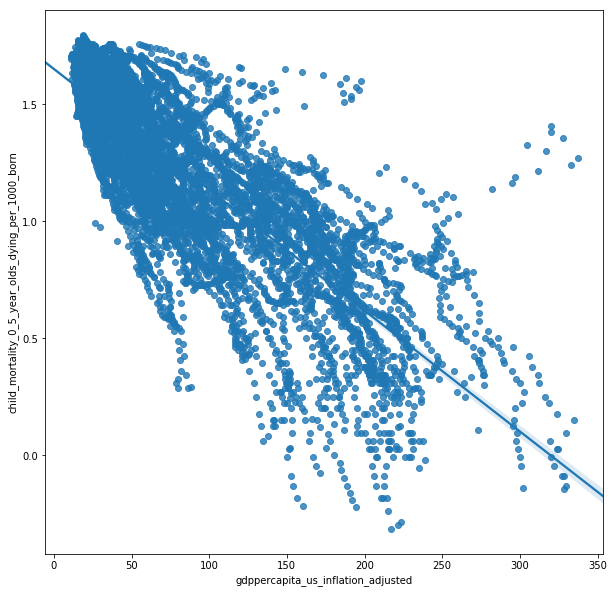

In [87]:
fig = plt.figure(figsize = ((10, 10)))
sns.regplot(np.power(X['gdppercapita_us_inflation_adjusted'], 0.5), np.log(y), data=data)

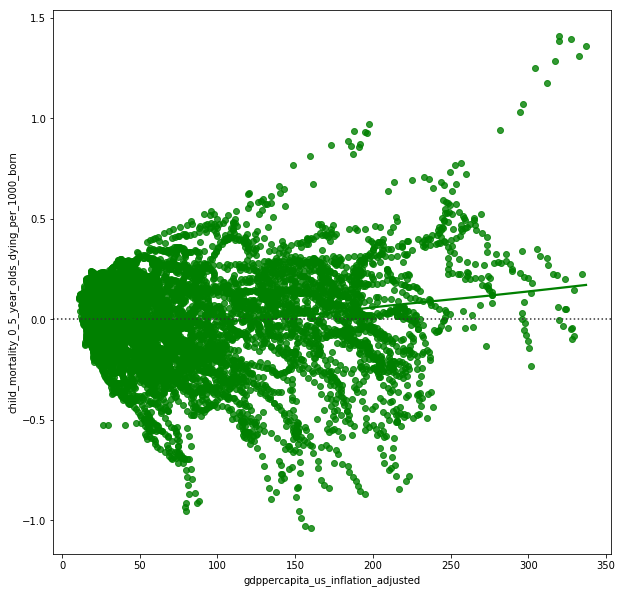

In [90]:
fig = plt.figure(figsize = ((10, 10)))
sns.residplot(np.power(X['gdppercapita_us_inflation_adjusted'], 0.5), np.log(y), lowess=True, color="g")